In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
#path for training set
train_path = "Train.csv"
#path for testing set
test_path = "Test.csv"

In [3]:
# training data as a DataFrame
train_df = pd.read_csv(train_path)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df=pd.read_csv(test_path)
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Missing Values

In [7]:
print("Train data:\n")
print(missing_train := train_df.isnull().sum(),"\n\n")
print(missing_train/train_df.shape[0]*100)

Train data:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [8]:
print("Test data:\n")
print(missing_test := test_df.isnull().sum(),"\n\n")
print(missing_test/test_df.shape[0]*100)

Test data:

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 


Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


#### We can see the % of each missing Values per columns is almost identical!

    column	     size
    Outlet_Size	28%
    Item_Weight	17%

In [9]:
print("Outlet_Size:\n", train_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




#### Outlet_Size is a categorical column, so we will replace missing values with Medium  (mode value)


In [10]:
print("test mode, train mode\n",[train_df['Outlet_Size'].mode().values[0],
                                 test_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [11]:
#Fill train data
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(
train_df['Outlet_Size'].dropna().mode().values[0])

#Fill test data
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(
test_df['Outlet_Size'].dropna().mode().values[0])

#check if we fill missing values or not
train_df['Outlet_Size'].isnull().sum(),test_df['Outlet_Size'].isnull().sum()

(0, 0)

#### item_weight is a numerical column therefore we need to visualize it's distribution for a clearer display

<function matplotlib.pyplot.show(close=None, block=None)>

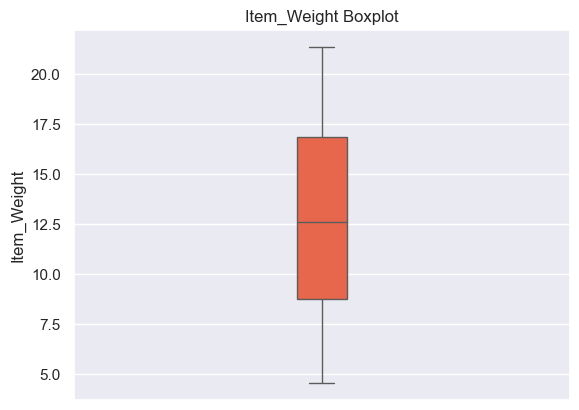

In [12]:
sns.boxplot(data=train_df['Item_Weight'],orient='v', width=0.1,color = '#FF5733')
plt.title("Item_Weight Boxplot")
plt.show

#### As there are no outliers so we can fill the missing data with mean.

In [13]:
#Fill train data
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(
train_df['Item_Weight'].dropna().mean())

#Fill test data
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(
test_df['Item_Weight'].dropna().mean())

#check if we fill missing values or not
train_df['Item_Weight'].isnull().sum(),test_df['Item_Weight'].isnull().sum()

(0, 0)

### Data Exploration

In [14]:
#list of all the numeric columns
numerics = train_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
categories = train_df.select_dtypes('object').columns.to_list()

#numeric df
BM_numeric =  train_df[numerics]
#categoric df
BM_category = train_df[categories]


[train_df[category].value_counts() for category in categories[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

##### We can See we have Repeating values with different names in the Item_Fat_Content column, we will correct them using the using the .replace() method

In [15]:
#train
train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##### Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age

In [16]:
#creating our new column for both datasets
train_df['Outlet_Age']= train_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
test_df['Outlet_Age']= test_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
train_df['Outlet_Age'].head()
test_df['Outlet_Age'].head()


0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

### Data Visualization

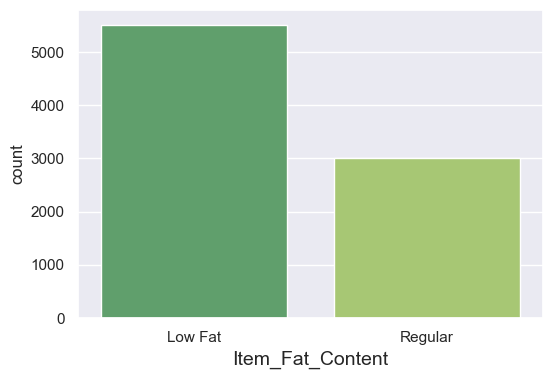

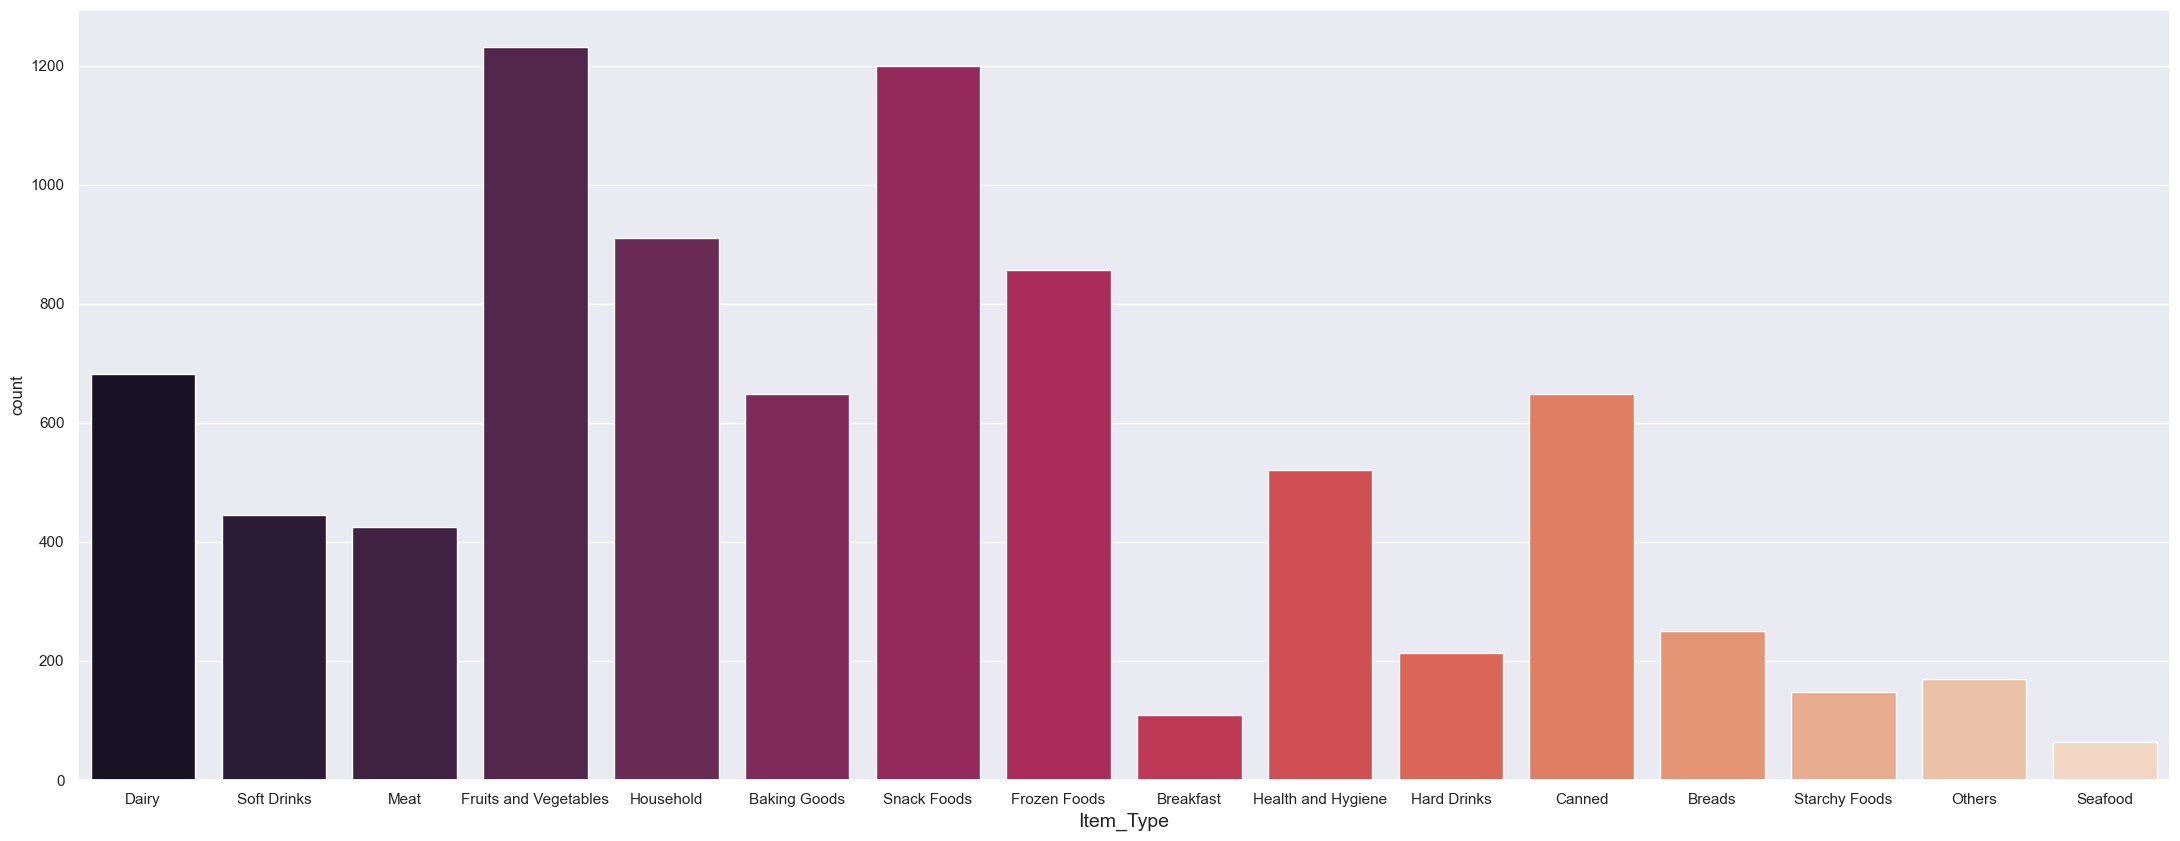

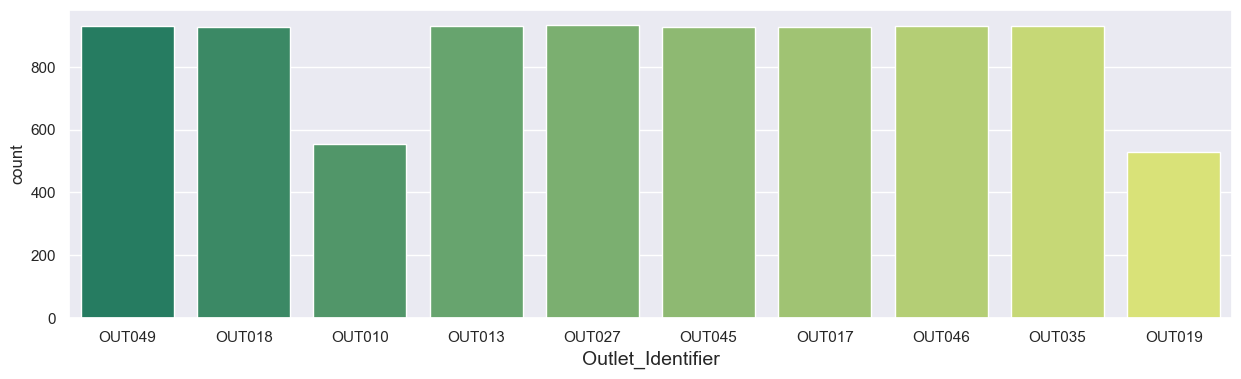

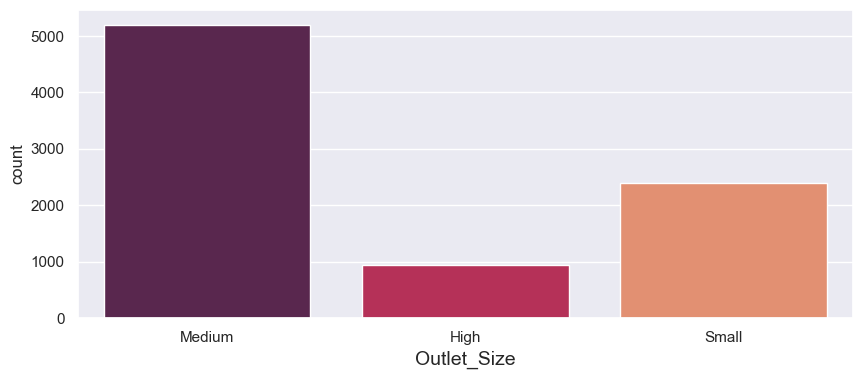

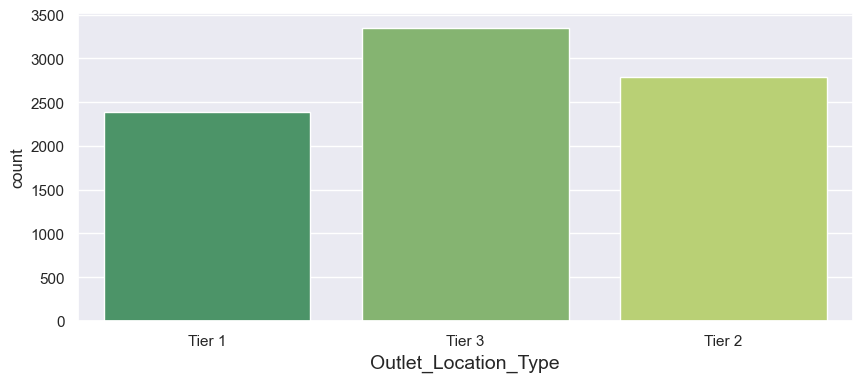

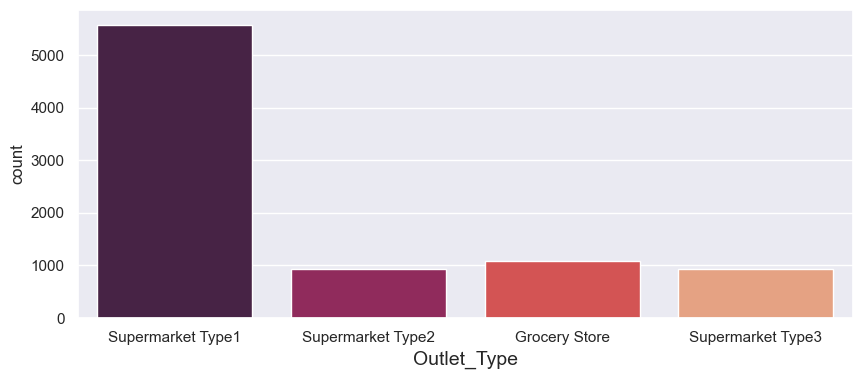

In [17]:
#categorical columns

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_df ,palette='summer')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train_df ,palette='rocket')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train_df ,palette='summer')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train_df ,palette='rocket')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train_df ,palette='summer')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

#### Categoric columns realizations
    Item_Fat_Content - Most items sold are low fat.
    Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.
    Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.
    Outlet_Size - Bigmart outlets are mostly medium sized in our data.
    Outlet_Location_Type - The most common type is Tier3.
    Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.
Now for the numerical columns:

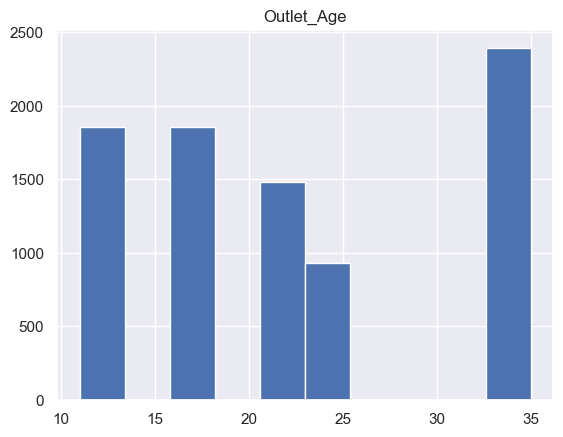

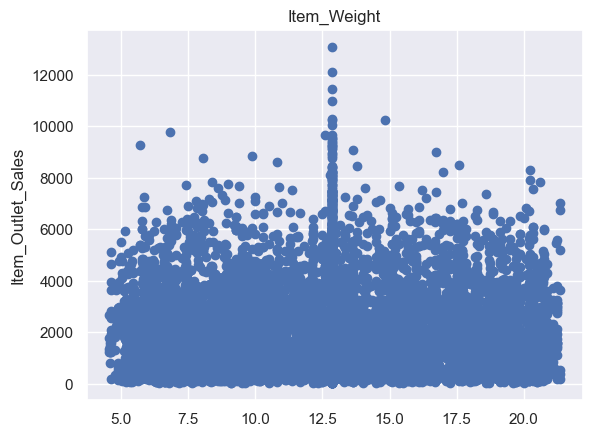

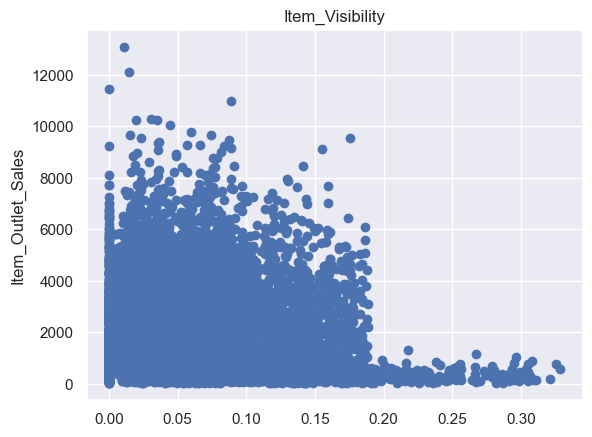

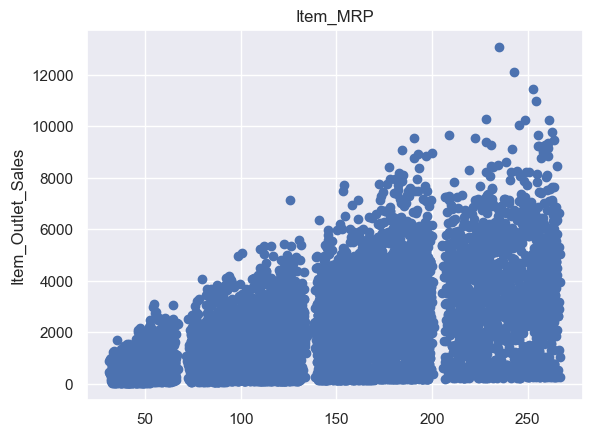

In [18]:
#numeric data

plt.hist(train_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_numeric[numerics[:3]]:
    plt.scatter(BM_numeric[numeric], BM_numeric['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### numeric columns realizations
    Outlet_Age - The most common outlets are 35 years old.
    Item_Weight - The data is very spreaded, no specific pattern.
    Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
    Item_MRP - Items with higher MRP tend to sell better in most cases.

#### multivariate plots
I want to check the following relationships with Item_Outlet_Sales:

    Sales per item type
    Sales per outlet
    Sales per outlet type
    Sales per outlet size
    Sales per location type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


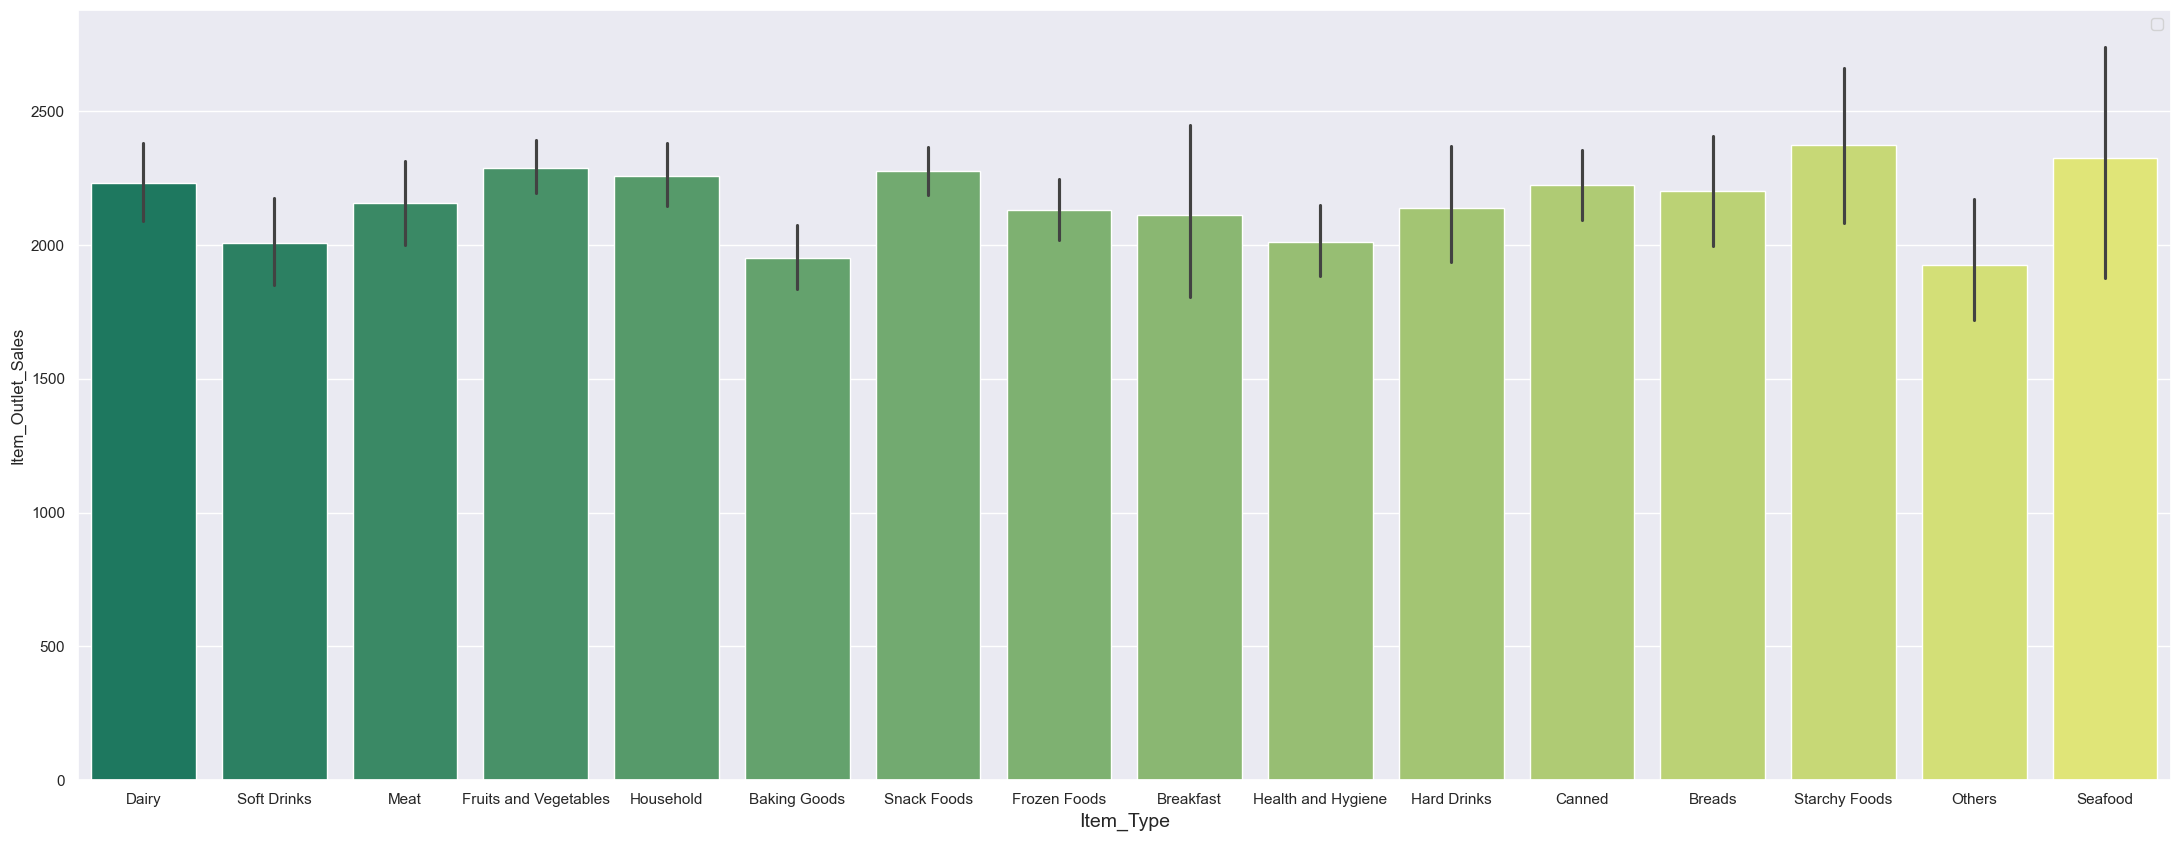

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


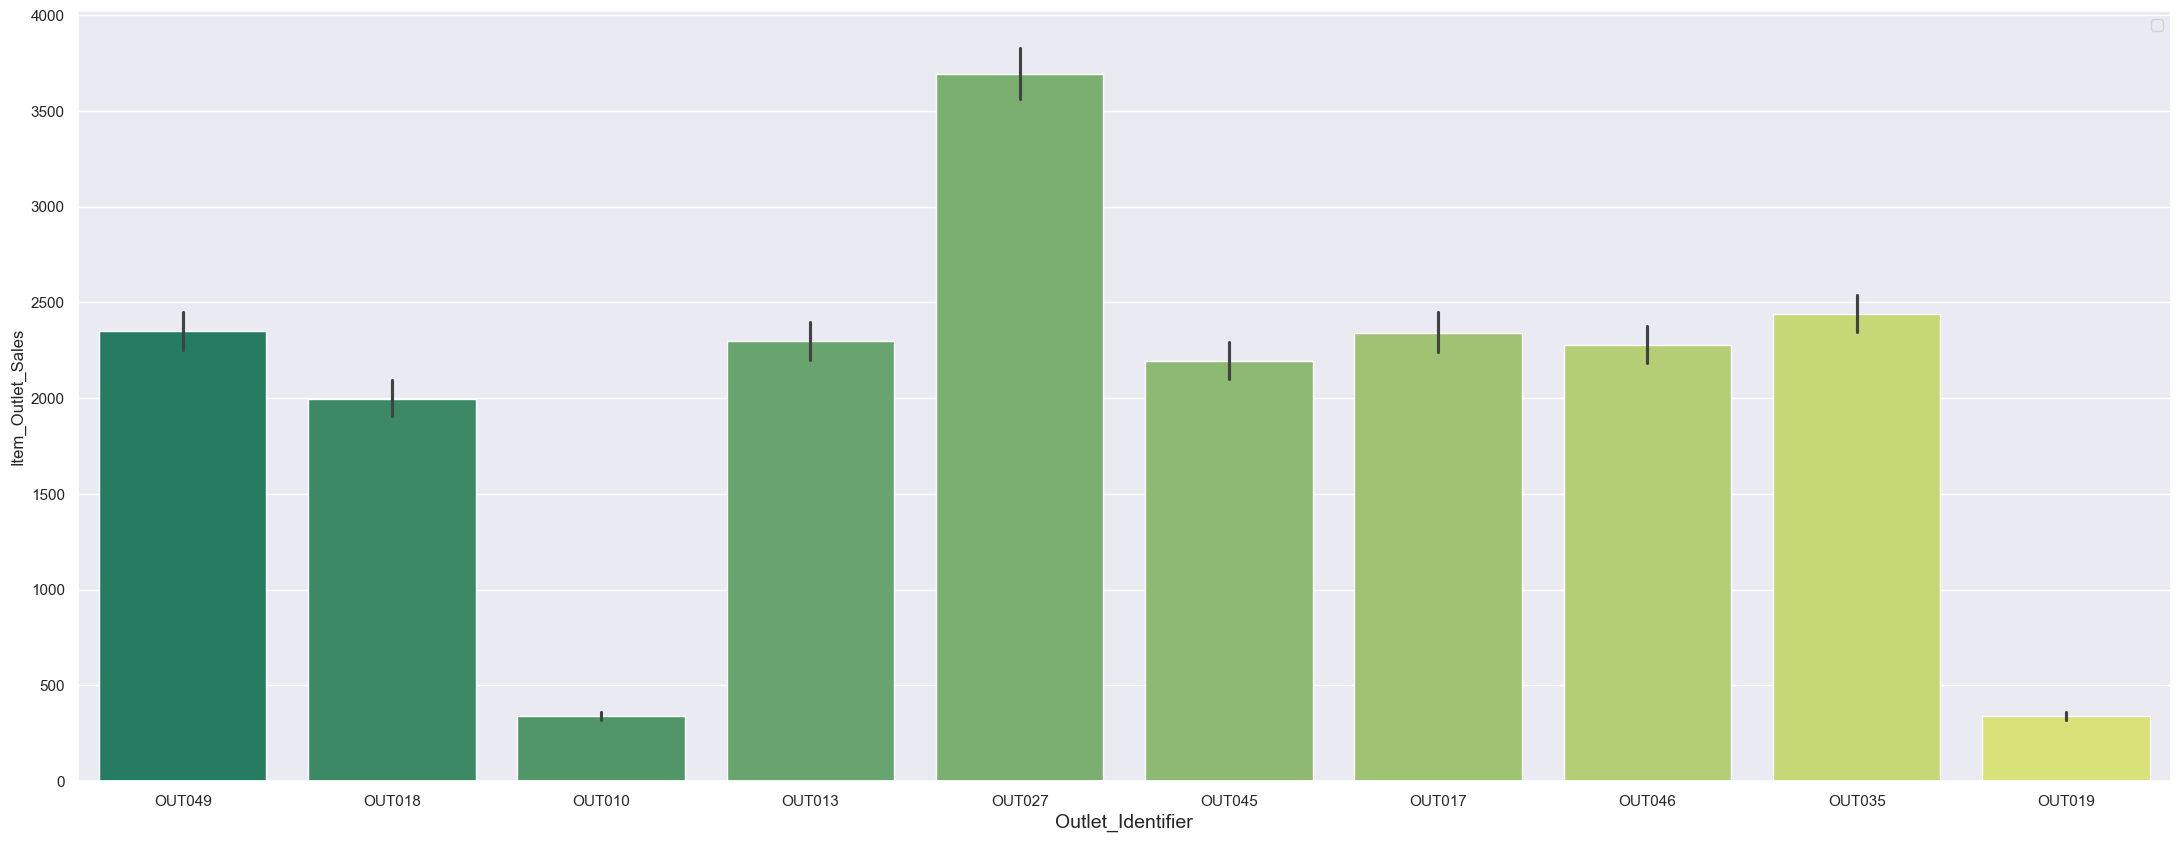

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


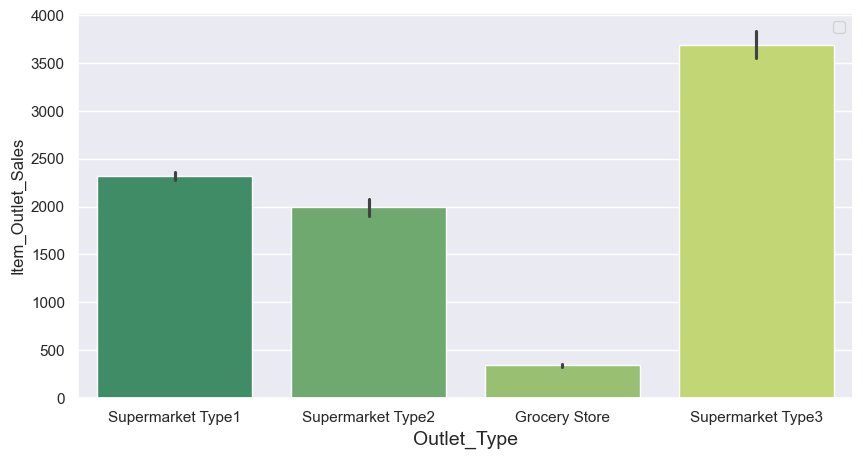

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


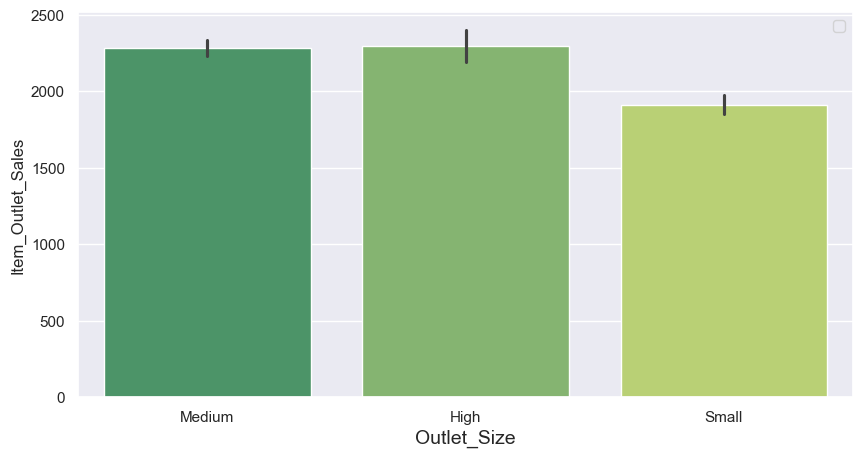

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


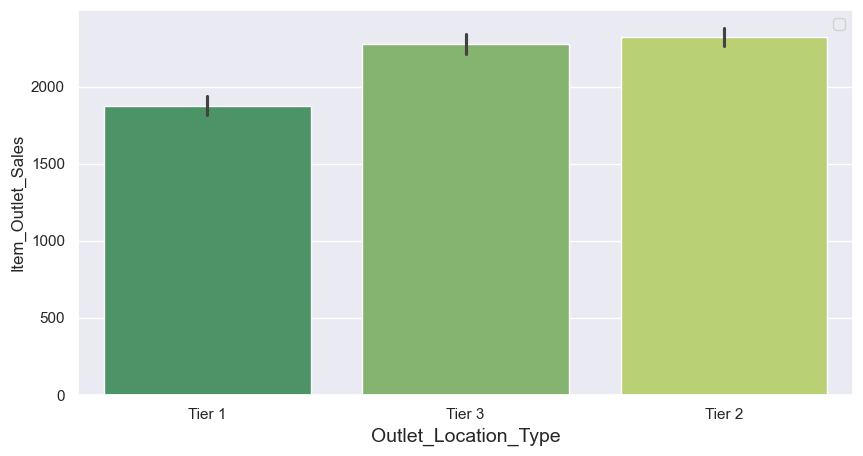

In [19]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=train_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=train_df ,palette='summer')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train_df ,palette='summer')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train_df ,palette='summer')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train_df ,palette='summer')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()


#### Realizations:

    The difference in item types by sales is very small.
    Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
    Suprisingly supermarket type 3 is the most profitable and not type 1.
    Medium and high outlet sizes are pretty much even in sales.
    Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

### Corraltion Matrix

<Axes: >

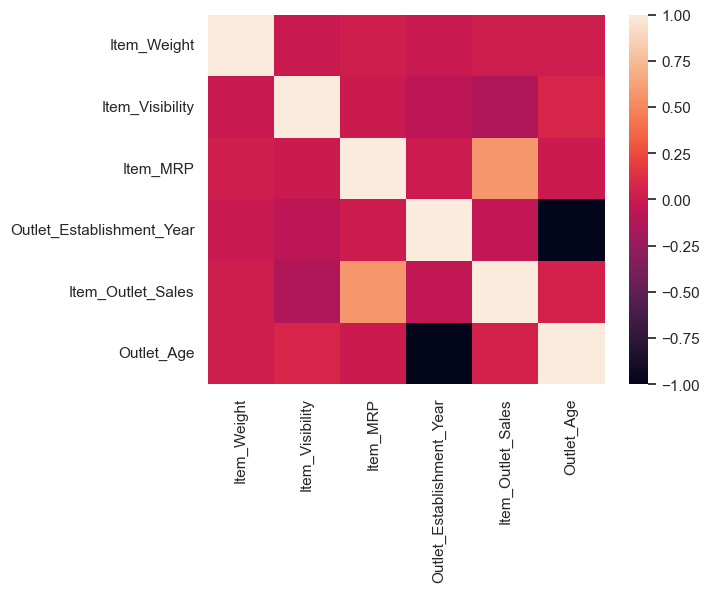

In [20]:
#plotting the correlation matrix
sns.heatmap(train_df.corr() ,cmap='rocket')

#### We can see Item_Outlet_Sales is highly correlated with Item_MRP

### Feature Engineering¶
### Categorical values:

    We have 7 columns we need to delete or encode.

    Ordinal variables:

        Item_Fat_Content
        Outlet_Size
        Outlet_Location_Type
        
    Nominal variables:

        Item_Identifier
        Item_Type
        Outlet_Identifier
        Outlet_Type
        
    Numeric values:

        From the numeric variables Outlet_Establishment_Year is no longer needed

### Conclusion:

    In my FE process i have decided:

        The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.
        All Ordinal variables will be Label encoded.
        The columns Outlet_Type and Item_Type will be One Hot encoded.

In [21]:
BM_category.apply(lambda x: x.nunique()) 
#checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [22]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])
    
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [23]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train_df[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(test_df[cols])).astype('int64')


#get feature columns
train_oh.columns = OH_encoder.get_feature_names_out(cols)
test_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
train_oh.index = train_df.index
test_oh.index = test_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train_fe = pd.concat([train_df, train_oh], axis=1)
test_fe = pd.concat([test_df, test_oh], axis=1)

# Dropping irrelevant columns

train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [24]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Machine Learning Models
    First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Item_Outlet_Sales the target value we want to predict.

    Assumptions:

    This is a regression problem so we will use Regression methods.

    Train test split will be a 8:2 ratio respectively.

#### Models we will use:
    Linear Regression
    Random Forest Regressor
    Lasso Regressor
#### The Process of Modeling the Data:
    Importing the model
    Fitting the model
    Predicting Item Outlet Sales
    Regression metrics

#### Score Metrics for Regression:
    Mean Absolute Error 
    Mean Squared Error (MSE) 
    R^2 (coefficient of determination) 

In [25]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [26]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### Linear Regression

In [30]:
LinearReg = LinearRegression()

#fit
LinearReg.fit(X_train, y_train)

#predict
y_predict = LinearReg.predict(X_test)

#score variables
Lr_MAE = round(MAE(y_test, y_predict),2)
Lr_MSE = round(MSE(y_test, y_predict),2)
Lr_R2 = round(R2(y_test, y_predict),4)
Lr_CS  = round(CVS(LinearReg, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {Lr_MAE}\n")
print(f" Mean Squared Error: {Lr_MSE}\n")
print(f" R^2 Score: {Lr_R2}\n")
cross_val(LinearReg,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [31]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv") 

### Random Forest Regressor

In [32]:
RandForest= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RandForest.fit(X_train, y_train)
#predict
y_predict = RandForest.predict(X_test)

#score variables
Rfr_MAE = round(MAE(y_test, y_predict),2)
Rfr_MSE = round(MSE(y_test, y_predict),2)
Rfr_R2 = round(R2(y_test, y_predict),4)
Rfr_CS  = round(CVS(RandForest, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {Rfr_MAE}\n")
print(f" Mean Squared Error: {Rfr_MSE}\n")
print(f" R^2 Score: {Rfr_R2}\n")
cross_val(RandForest,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5466


In [33]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")  

### Lasso Regressor

In [35]:
LassoReg = Lasso(alpha = 0.05)
#fit
LassoReg.fit(X_train,y_train)

#predict
y_predict = LassoReg.predict(X_test)

#score variables
Lsr_MAE = round(MAE(y_test, y_predict),2)
Lsr_MSE = round(MSE(y_test, y_predict),2)
Lsr_R2 = round(R2(y_test, y_predict),4)
Lsr_CS  = round(CVS(LassoReg, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {Lsr_MAE}\n")
print(f" Mean Squared Error: {Lsr_MSE}\n")
print(f" R^2 Score: {Lsr_R2}\n")
cross_val(LassoReg,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [36]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")   

### Conclusion

In [38]:
MAE= [Lr_MAE,Rfr_MAE,Lsr_MAE]
MSE= [Lr_MSE,Rfr_MSE,Lsr_MSE]
R2= [Lr_R2,Rfr_R2,Lsr_R2]
Cross_score= [Lr_CS,Rfr_CS,Lsr_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.07,1285554.86,0.5594,0.5581
0,Linear Regression,838.19,1285793.54,0.5593,0.5580
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.5920


### Realizations
    Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).
    Linear Regression and Lasso Regressor have the best perfomance in most categories.
    only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.